In [19]:
# import packages
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Load Data

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
metadata_path = './cifar-100-python/meta' # change this path`\
metadata = unpickle(metadata_path)
superclass_dict = dict(list(enumerate(metadata[b'coarse_label_names'])))


In [9]:
data_pre_path = './cifar-100-python/' # change this path
# File paths
data_train_path = data_pre_path + 'train'
data_test_path = data_pre_path + 'test'
# Read dictionary
data_train_dict = unpickle(data_train_path)
data_test_dict = unpickle(data_test_path)
# Get data (change the coarse_labels if you want to use the 100 classes)
data_train = data_train_dict[b'data']
label_train = np.array(data_train_dict[b'coarse_labels'])
data_test = data_test_dict[b'data']
label_test = np.array(data_test_dict[b'coarse_labels'])


In [17]:
data_test.shape

(10000, 3072)

In [16]:
len(data_test[0])

3072

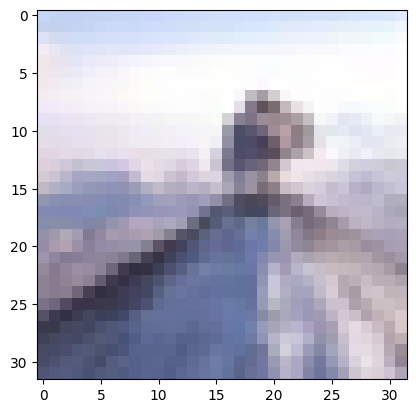

In [22]:
# Display the first image in the numpy array

# Get the numpy array that contains all the images
matrix = data_test

# Select the first row in the array
row = matrix[0]

# Extract each channel
ch0 = row[0:1024] 
ch1 = row[1024:2048]
ch2 = row[2048:]

# Reshape to 32x32
ch0 = np.reshape(ch0, (32,32)) # red
ch1 = np.reshape(ch1, (32,32)) # green
ch2 = np.reshape(ch2, (32,32)) # blue

# Stack the matrices along the channel axis
image = np.dstack((ch0, ch1, ch2))

plt.imshow(image)
plt.show()



In [ ]:
base_path = '../insect_images/'

class_dir = 'Ant'

target_dir = os.path.join(base_path, class_dir)


try:
    image_files = os.listdir(target_dir)
    
    image_files = [f for f in image_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print(f"Error: No image files found in '{target_dir}'.")
    else:
        # select the first image file found
        first_image_filename = image_files[0]
        full_image_path = os.path.join(target_dir, first_image_filename)

        print(f"Attempting to display: {full_image_path}")
        
        img = Image.open(full_image_path)
        
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"Example Image: {first_image_filename}")
        plt.axis('off')
        plt.show()
        
except FileNotFoundError:
    print(f"Error: Directory not found. Please ensure the path '{target_dir}' is correct relative to your notebook.")
except Exception as e:
    print(f"An error occurred: {e}")